In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
train_data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

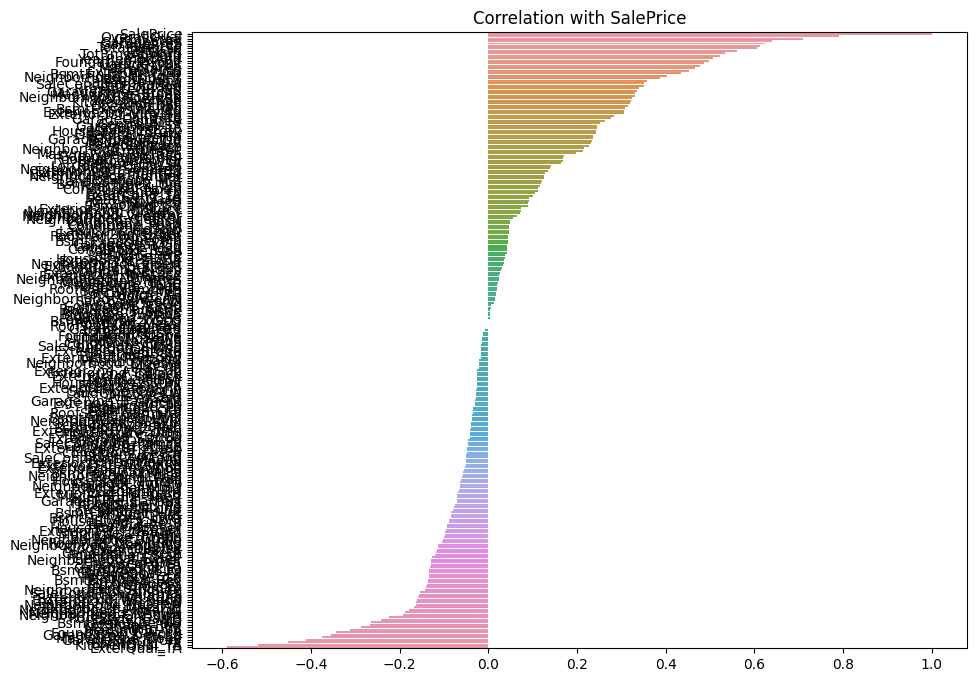

Highly correlated features with SalePrice: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_TA', 'ExterQual_TA']


In [41]:
# Explore the dataset
train_data.info()

categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns using one-hot encoding
encoded_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
# Visualize the correlation matrix with SalePrice
plt.figure(figsize=(10, 8))
corr_with_saleprice = encoded_data.corr()['SalePrice'].sort_values(ascending=False)
sns.barplot(x=corr_with_saleprice.values, y=corr_with_saleprice.index)
plt.title("Correlation with SalePrice")
plt.show()

# Select features with correlation coefficient above 0.5
high_corr_features = corr_with_saleprice[abs(corr_with_saleprice )> 0.5].index.tolist()
high_corr_features.remove('SalePrice')  # Remove SalePrice itself
print("Highly correlated features with SalePrice:", high_corr_features)


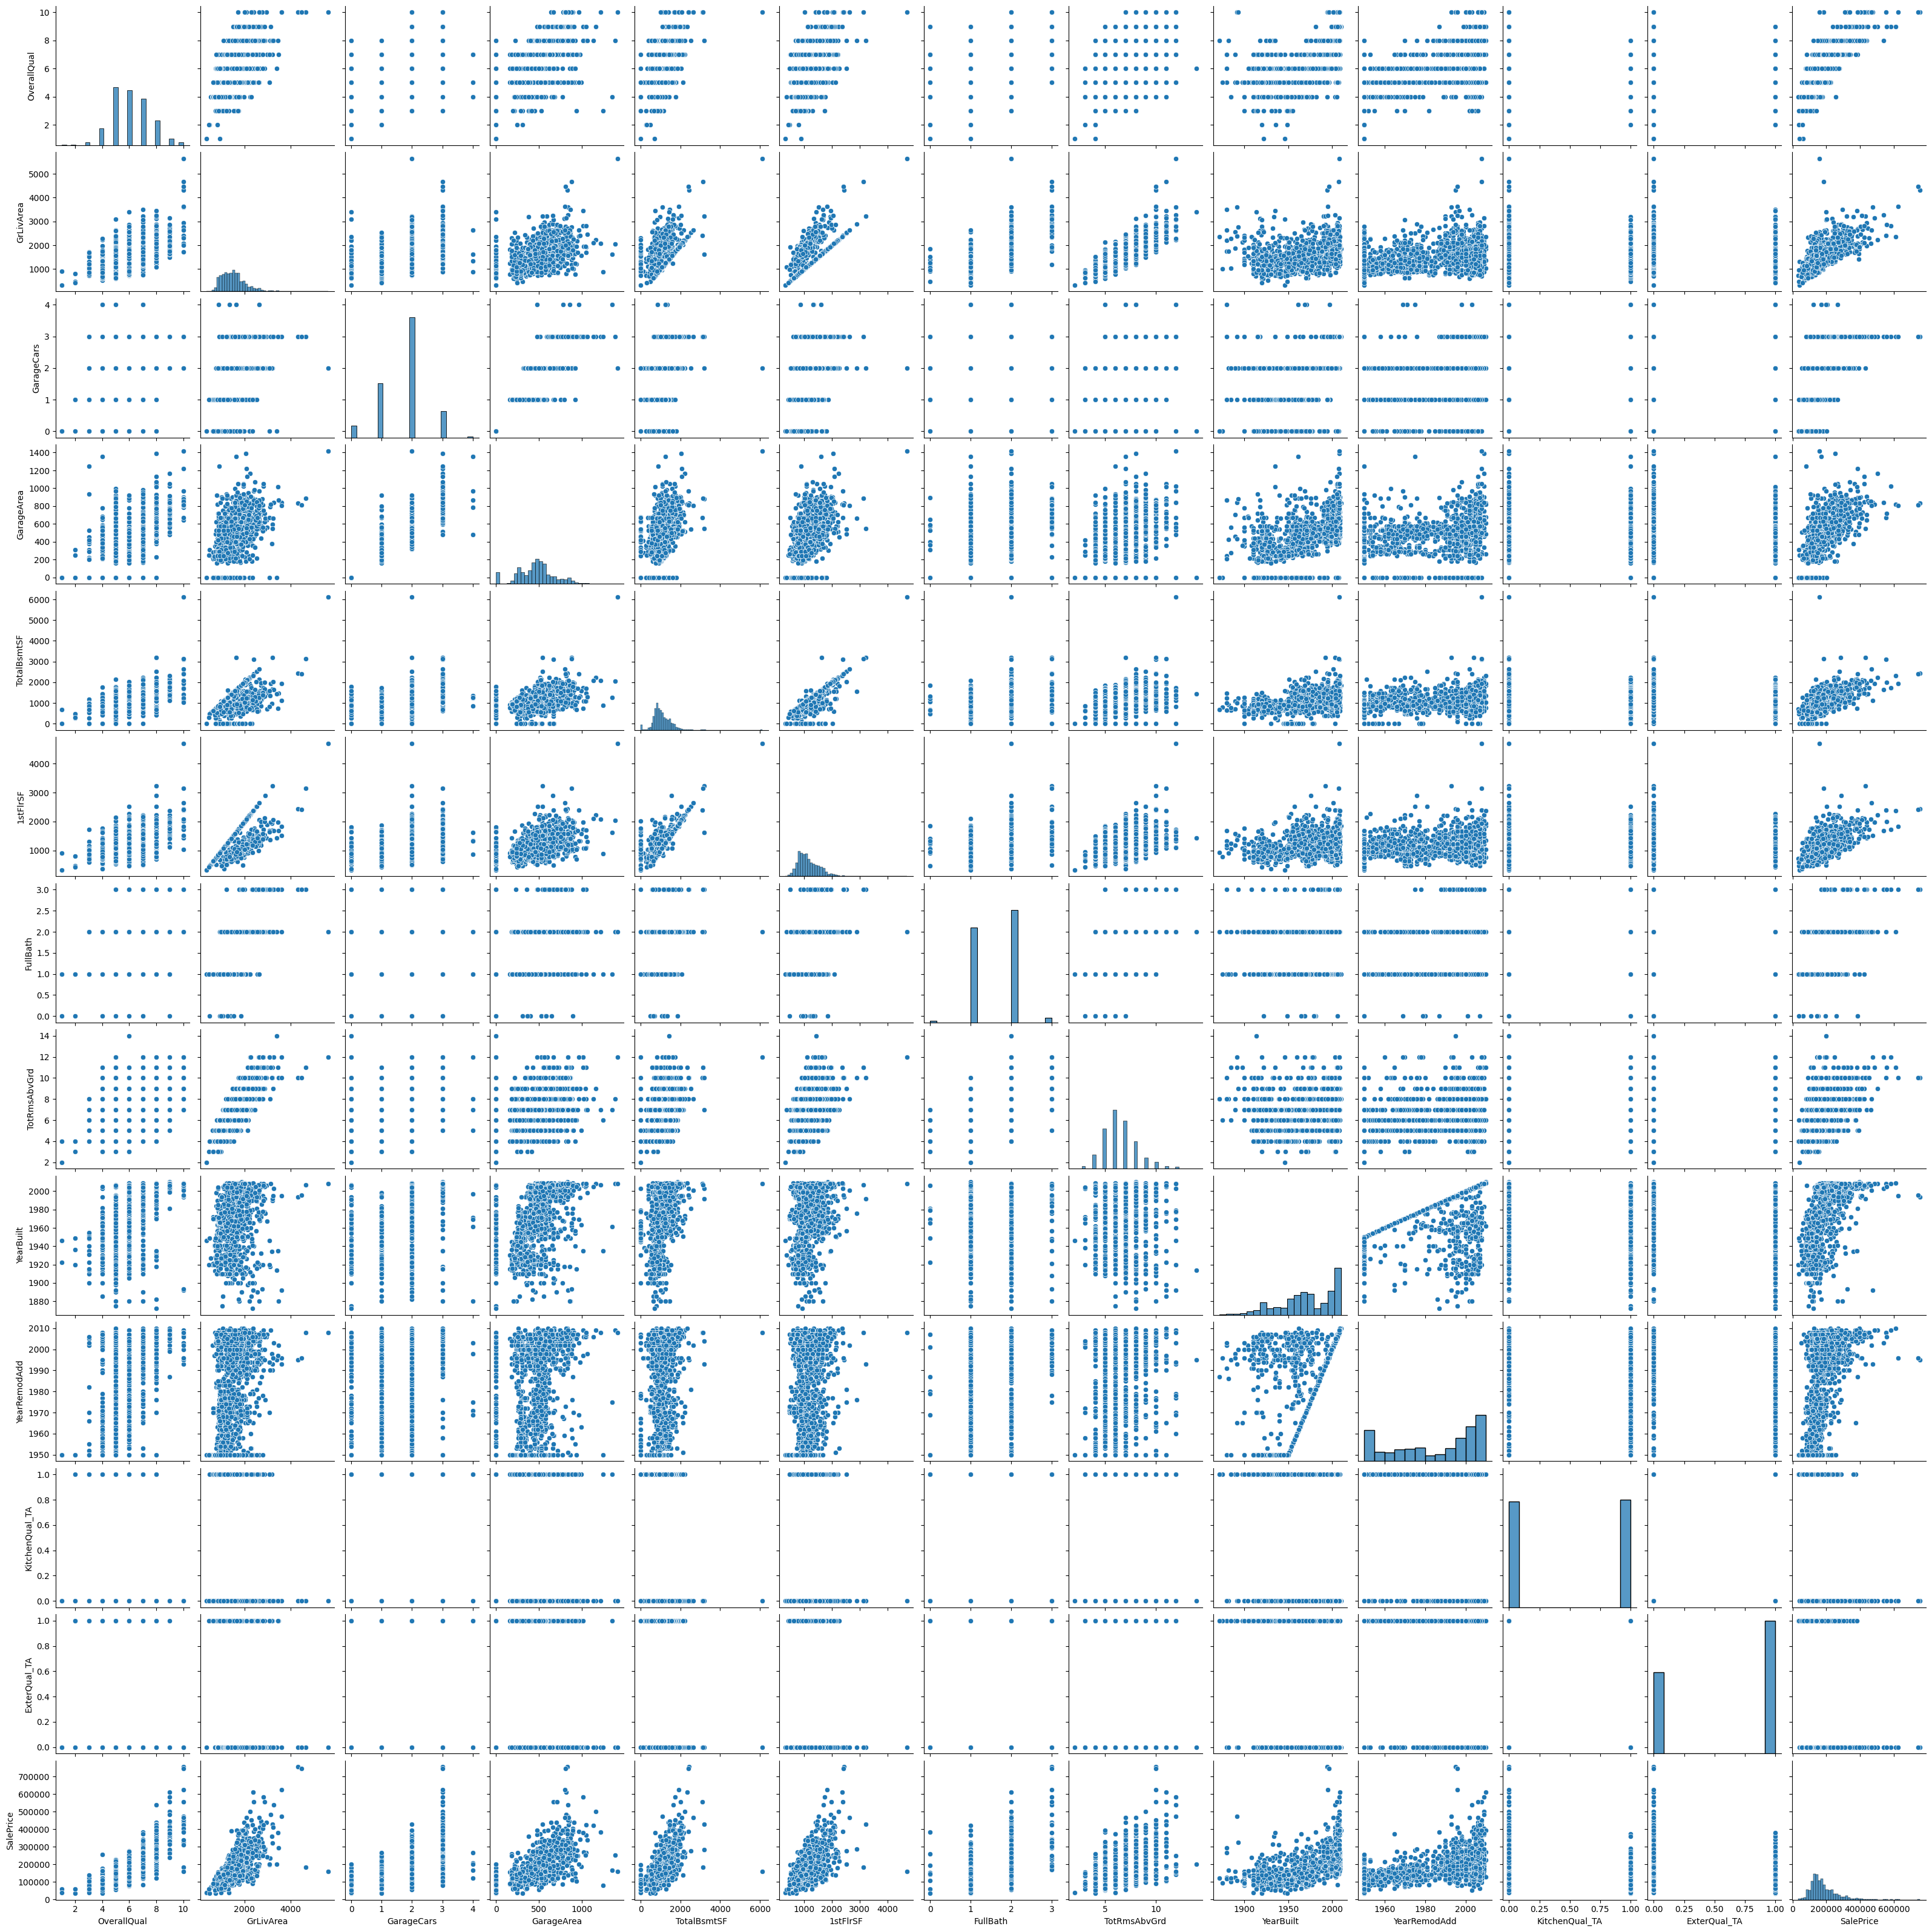

Number of outliers removed: 54


In [42]:

# EDA and preprocessing using only the selected features
selected_features = high_corr_features + ['SalePrice']
selected_data = encoded_data[selected_features]

# Visualize pairplot for selected features
sns.pairplot(selected_data)
plt.show()

# Handling missing values (customize as needed)
selected_data = selected_data.fillna(0)  # Filling missing values with 0 for simplicity

# Remove outliers
z_scores = (selected_data - selected_data.mean()) / selected_data.std()
outlier_threshold = 3
outlier_mask = (z_scores.abs() > outlier_threshold).any(axis=1)
cleaned_data = selected_data[~outlier_mask]
print(f"Number of outliers removed: {sum(outlier_mask)}")

# Split the cleaned data into features (X) and target variable (y)
X_selected = cleaned_data.drop('SalePrice', axis=1)
y_selected = cleaned_data['SalePrice']

# Standardize the features
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Split the data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected_scaled, y_selected, test_size=0.2, random_state=42)

In [43]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_sel, y_train_sel)
linear_pred = linear_model.predict(X_test_sel)

# Ridge Regression
ridge_model = Ridge(alpha=10.0)  
ridge_model.fit(X_train_sel, y_train_sel)
ridge_pred = ridge_model.predict(X_test_sel)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)  
lasso_model.fit(X_train_sel, y_train_sel)
lasso_pred = lasso_model.predict(X_test_sel)

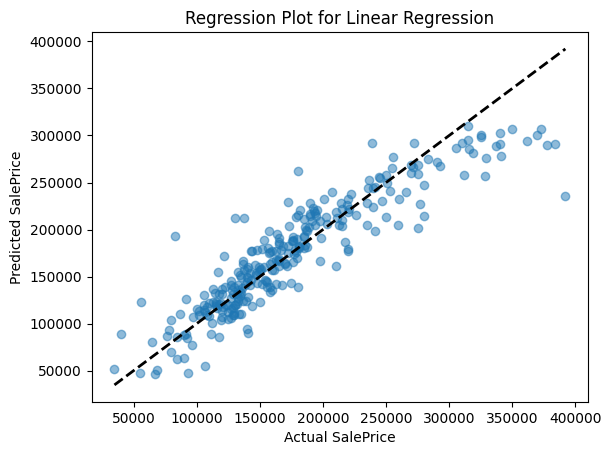

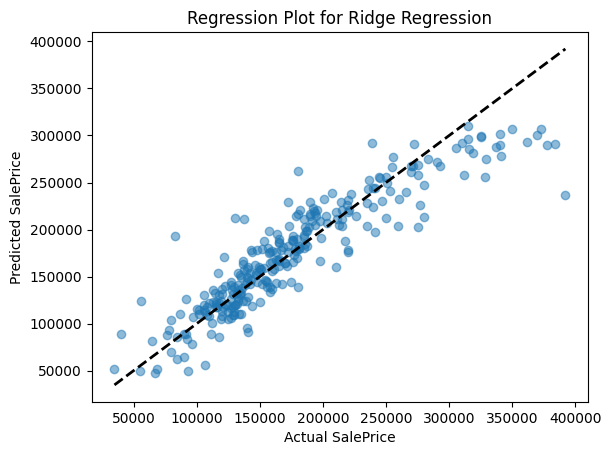

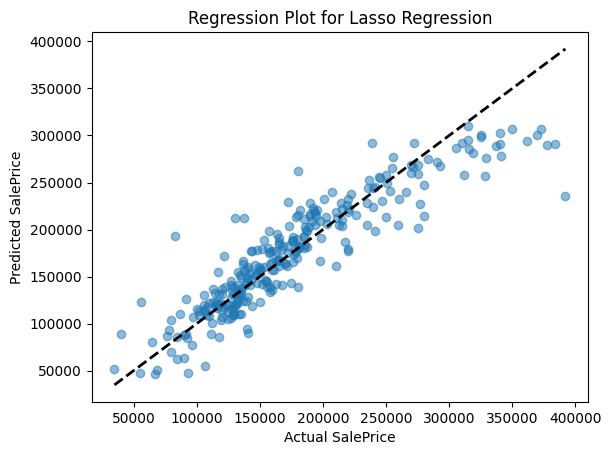

In [44]:
def plot_regression_results(model_name, y_test, y_pred):
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual SalePrice')
    plt.ylabel('Predicted SalePrice')
    plt.title(f'Regression Plot for {model_name}')
    plt.show()

# Plot regression plots for each model
plot_regression_results("Linear Regression", y_test_sel, linear_pred)
plot_regression_results("Ridge Regression", y_test_sel, ridge_pred)
plot_regression_results("Lasso Regression", y_test_sel, lasso_pred)

[818784692.0848981, 818852869.9927797, 818784750.6941916]


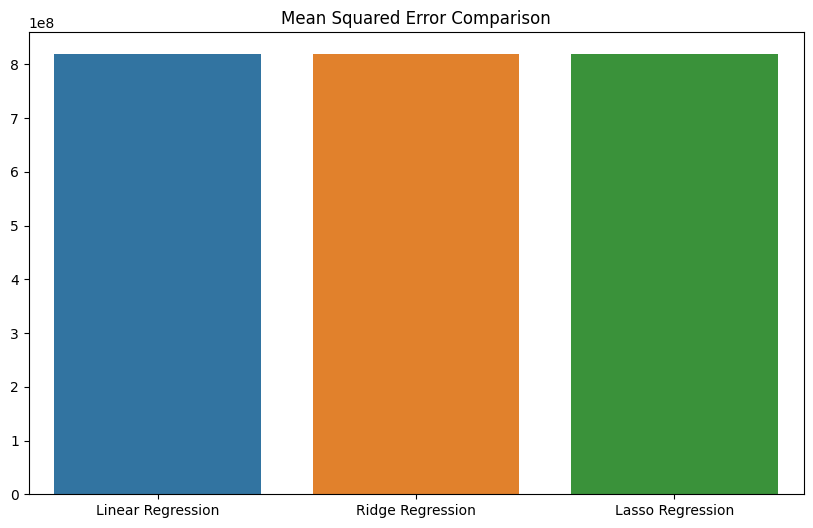

In [45]:
# Evaluate the models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

linear_mse = evaluate_model(linear_model, X_test_sel, y_test_sel)
ridge_mse = evaluate_model(ridge_model, X_test_sel, y_test_sel)
lasso_mse = evaluate_model(lasso_model, X_test_sel, y_test_sel)

# Compare the performance
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
mse_values = [linear_mse, ridge_mse, lasso_mse]
print(mse_values)
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_values)
plt.title('Mean Squared Error Comparison')
plt.show()